In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


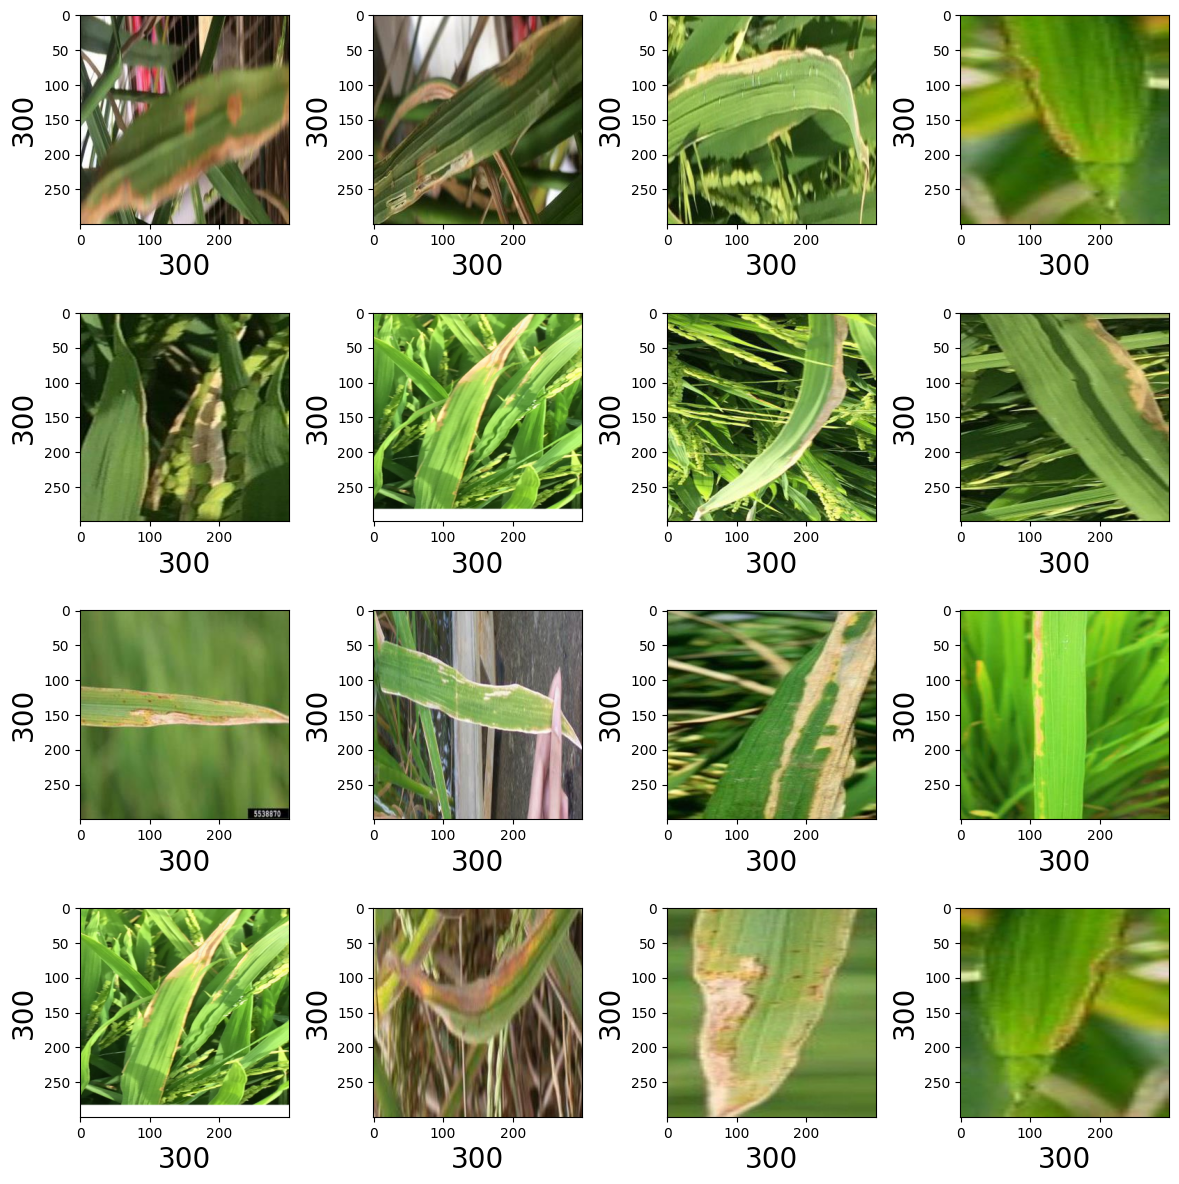

In [4]:
# Plotting 12 images to check dataset
#Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "C:/B.Tech/B.Tech Projects/2nd year/Design Project/Rice Leaf Disease Images/Bacterialblight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

In [5]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
dir = "C:/B.Tech/B.Tech Projects/2nd year/Design Project/Rice Leaf Disease Images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Bacterialblight', 'Blast', 'Brownspot','Tungro']
binary_labels = [0,1,2,3]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])



Now we will convert all the images into numpy array.


In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

0
2    1600
0    1584
1    1440
3    1308
Name: count, dtype: int64

In [8]:
#Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [9]:
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(5932,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [11]:
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,356 (903.73 KB)

 Trainable params: 231,356 (903.73 KB)

 Non-trainable params: 0 (0.00 B)


While compiling the model we need to set the type of loss which will be Binary Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [15]:
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
# Training the model
epochs = 5
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2555 - loss: 1.3999 - val_accuracy: 0.2561 - val_loss: 1.3862
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2707 - loss: 1.3862 - val_accuracy: 0.2561 - val_loss: 1.3861
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2752 - loss: 1.3860 - val_accuracy: 0.2561 - val_loss: 1.3861
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2788 - loss: 1.3859 - val_accuracy: 0.2561 - val_loss: 1.3860
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2699 - loss: 1.3859 - val_accuracy: 0.2561 - val_loss: 1.3859


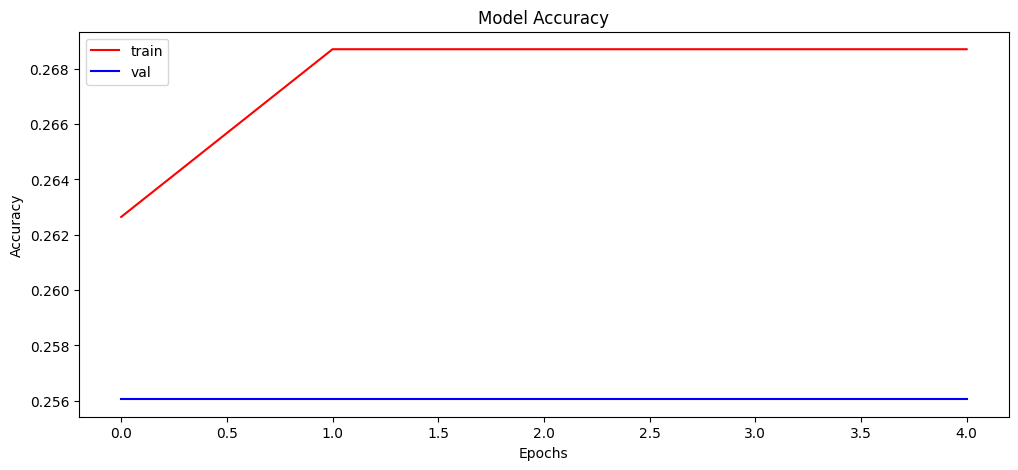

In [17]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [18]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.2513 - loss: 1.3860
Test Accuracy: 27.042964100837708


In [19]:
y_pred = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step


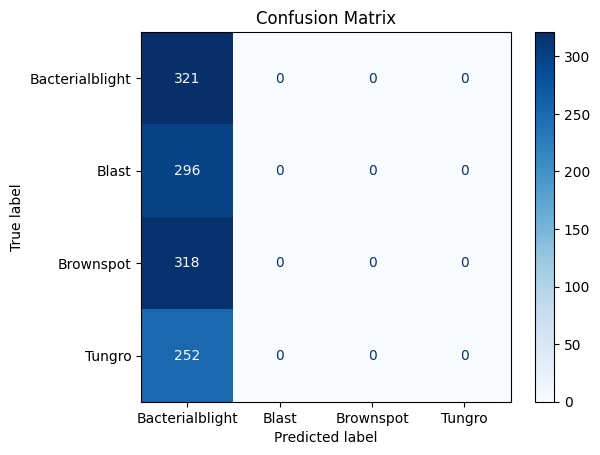

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Convert one-hot encoded labels back to single labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=np.arange(len(all_labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=all_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


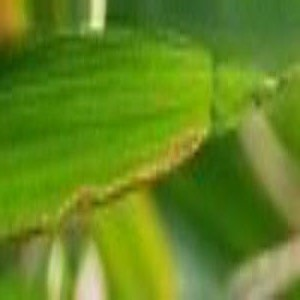

Predicted Disease: Bacterialblight


In [22]:
from IPython.display import display, Image as IPImage

def predict_and_display(image_path):
    # Load the image from the file path
    input_image = convert_image_to_array(image_path)

    # Preprocess the image for prediction
    input_image = np.array(input_image, dtype=np.float16) / 255.0
    input_image = input_image.reshape(1, 256, 256, 3)

    # Make predictions using the trained model
    predictions = model.predict(input_image)

    # Get the predicted class label
    predicted_label = all_labels[np.argmax(predictions)]

    # Display the image
    img = IPImage(filename=image_path, format='png')  # Update format based on your image type
    display(img)

    # Display the result
    print("Predicted Disease:", predicted_label)

# Example usage:
image_path_to_predict = "C:/B.Tech/B.Tech Projects/2nd year/Design Project/Rice Leaf Disease Images/Bacterialblight/BACTERAILBLIGHT3_001.jpg"  # Replace with the actual file path
predict_and_display(image_path_to_predict)


In [23]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Brownspot
Predicted :  Bacterialblight
